## Health Care

DESCRIPTION

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.


Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.



Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0



In [3]:
from io import IncrementalNewlineDecoder
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [50]:
## import the data
diabetes= pd.read_csv("/content/health care diabetes.csv")

In [5]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here 1 indicates the person is diabetes and 0 indicates the person is Non-diabetes.

In [7]:
##  columnname
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
## count of outcome column
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
##checking null value
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
##info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


A count of frequency (plot)describing the data types and the count of variables.


In [11]:
##glucose

diabetes['Glucose'].value_counts().head(10)

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
Name: Glucose, dtype: int64

In [12]:
diabetes['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [13]:
##bloodpressure
diabetes['BloodPressure'].value_counts().head(10)

70    57
74    52
78    45
68    45
72    44
64    43
80    40
76    39
60    37
0     35
Name: BloodPressure, dtype: int64

the help of groupby and outcome we can  create all column histogram

In [14]:
## the function will draw histogram by data column nameand title
def plot_histogram(data_val,title_name):
    plt.figure(figsize=[10,6])
    plt.hist(data_val,edgecolor="green")
    #plt.grid(axis='y', alpha=0.75)
    plt.title(title_name,fontsize=15)
    plt.show()

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

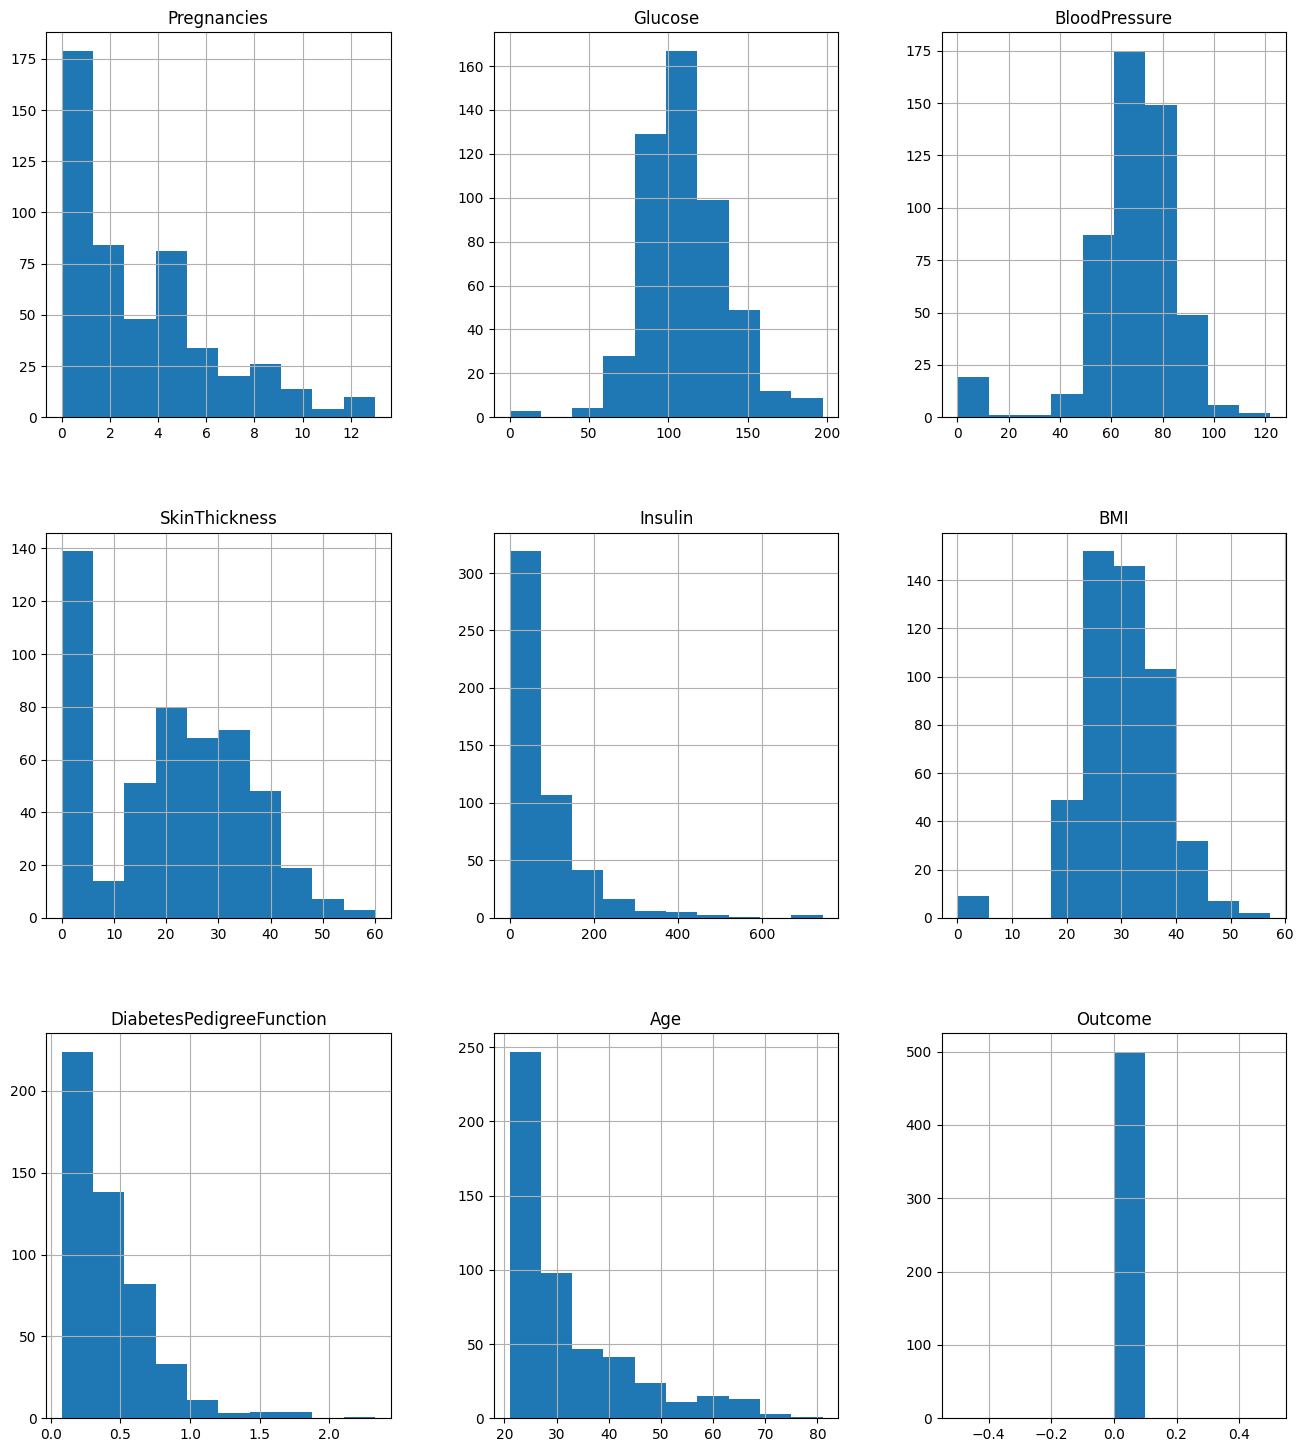

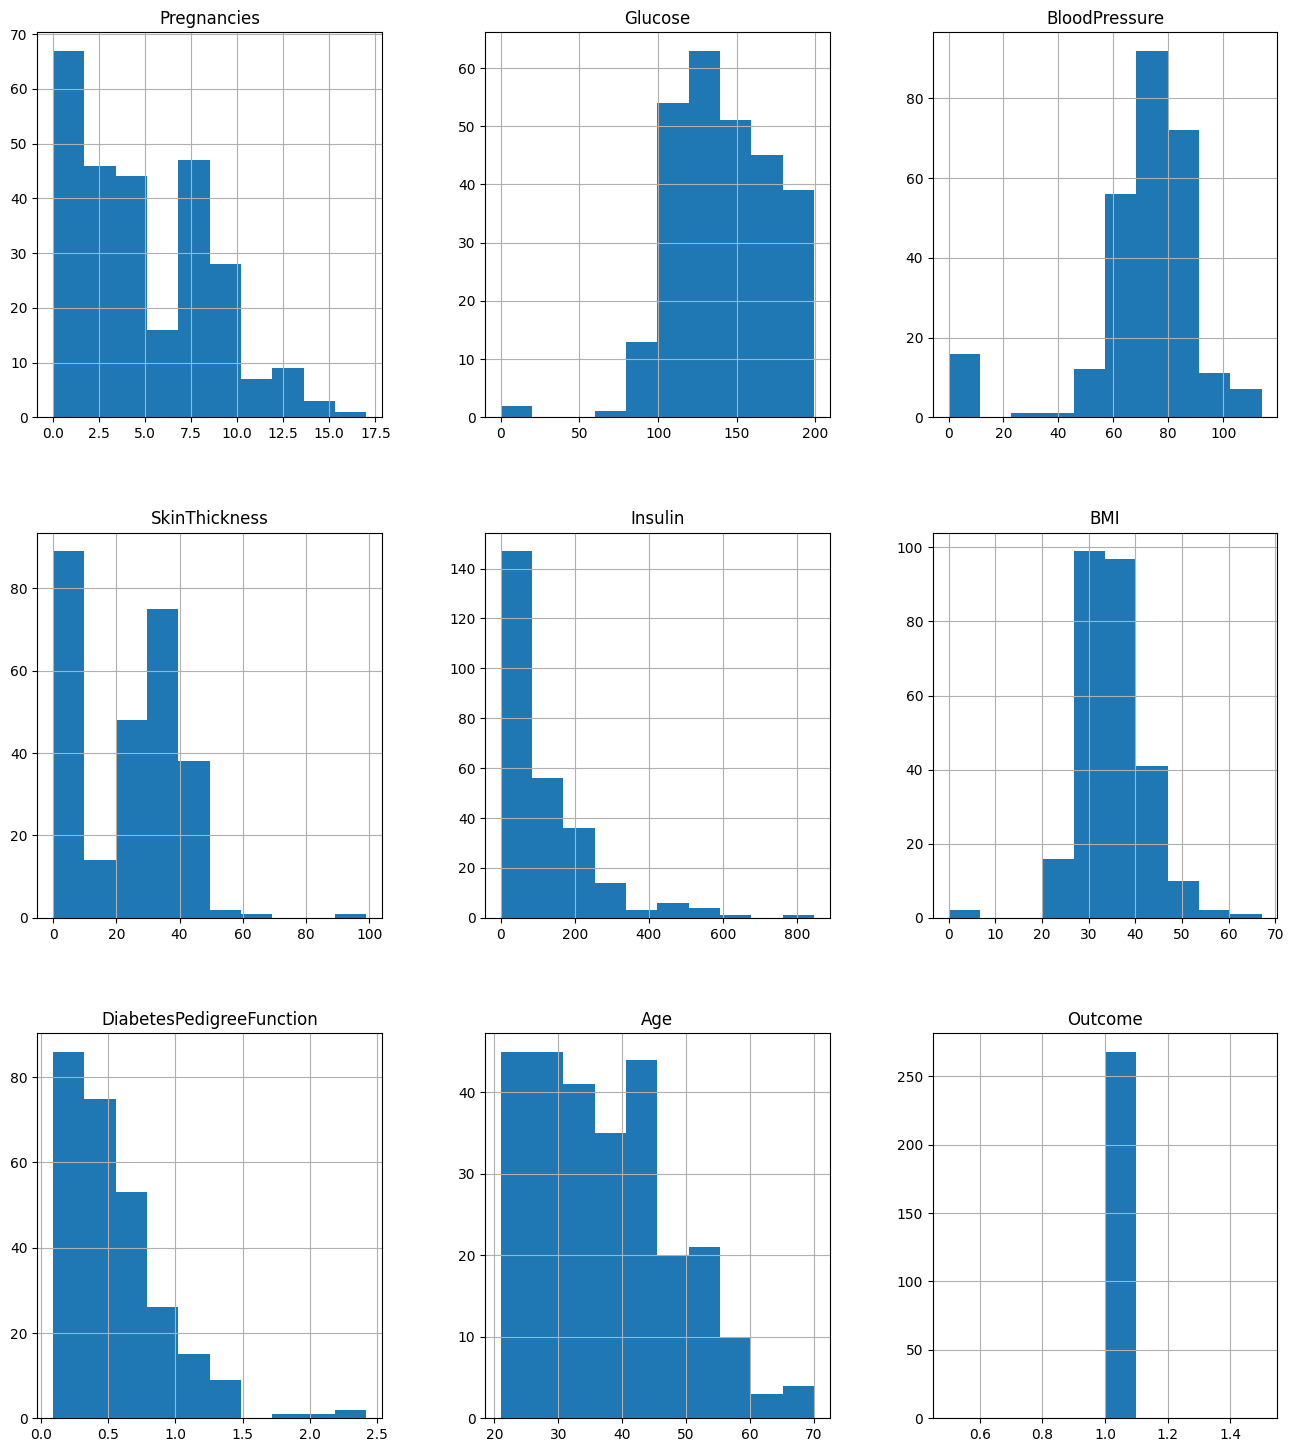

In [15]:
diabetes.groupby('Outcome').hist(figsize=(16, 18))

In [16]:
#function to get total count of zeros and outcome details together
def get_zeros_outcome_count(data,column_name):
    count = data[data[column_name] == 0].shape[0]
    print("Total No of zeros found in " + column_name + " : " + str(count))
    print(data[data[column_name] == 0].groupby('Outcome')['Age'].count())


In [17]:
#Checking count of zeros in blood pressure
get_zeros_outcome_count(diabetes,'BloodPressure')

Total No of zeros found in BloodPressure : 35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [18]:
##checking count of zeros in glucose
get_zeros_outcome_count(diabetes,'Glucose')

Total No of zeros found in Glucose : 5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [19]:
##checking count of zeros in skinthickness
get_zeros_outcome_count(diabetes,'SkinThickness')

Total No of zeros found in SkinThickness : 227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [20]:
##checking count of zeros in BMI
get_zeros_outcome_count(diabetes,'BMI')

Total No of zeros found in BMI : 11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [21]:
##checking count of zeros in insulin
get_zeros_outcome_count(diabetes,'Insulin')

Total No of zeros found in Insulin : 374
Outcome
0    236
1    138
Name: Age, dtype: int64


After analysing above data we found lots of 0 in Insulin and SkinThickness and removing them or putting mean value will not good dataset. However, we can remove "BloodPressure", "BMI" and "Glucose" zeros row


In [22]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [23]:
## the stats of data after removing bloodpressure,bmi,glucose 0 rows
diabetes_mod.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


### Data Exploration

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of
action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat m ap.


In [24]:
#Lets create positive variable and store all 1 value Outcome data
Positive = diabetes_mod[diabetes_mod['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Outcome
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

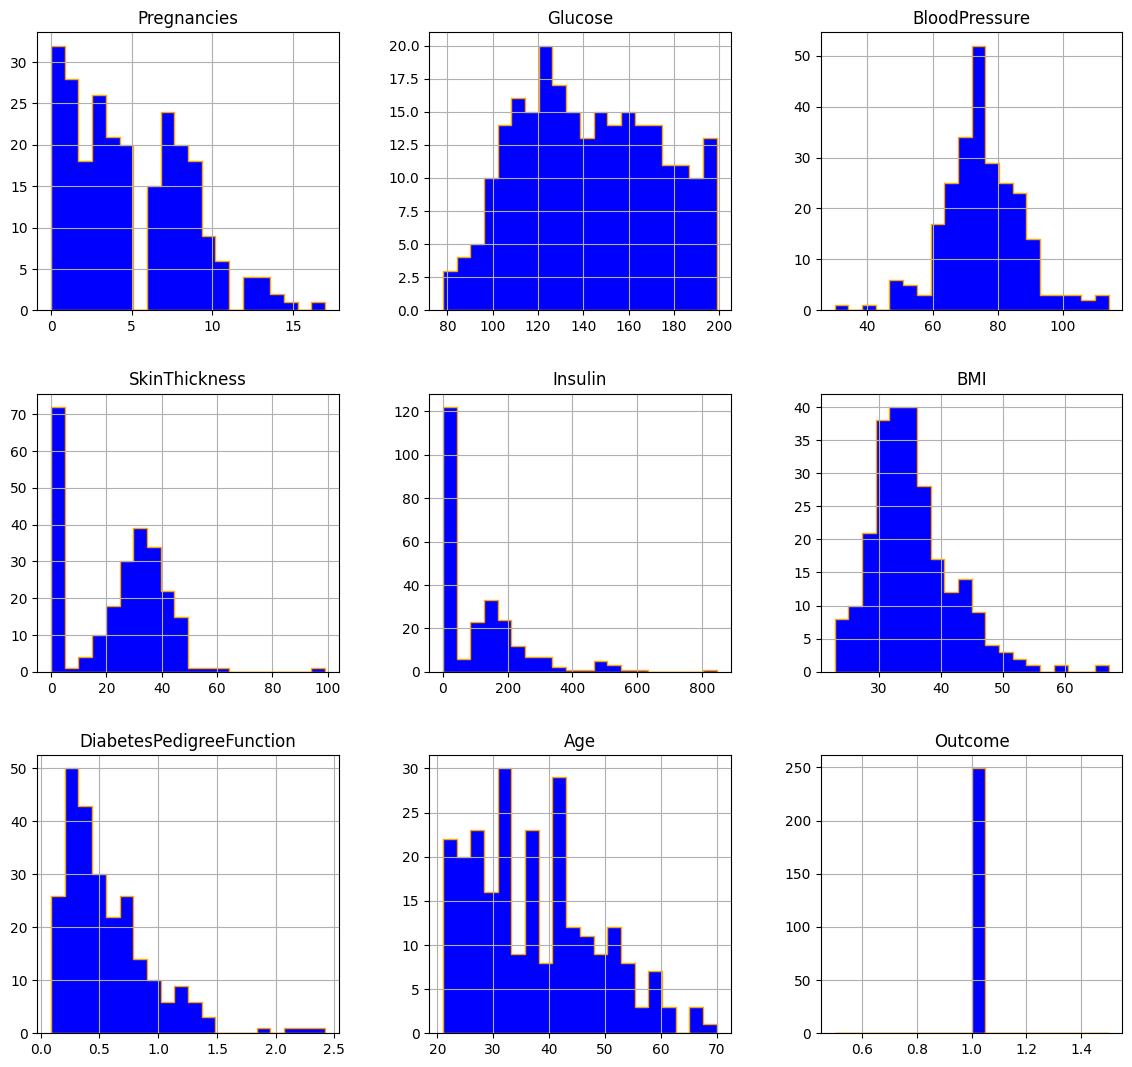

In [25]:
Positive.groupby('Outcome').hist(figsize=(14, 13),histtype='stepfilled',bins=20,color="blue",edgecolor="orange")

scatterplot for positive outcome


In [26]:
#function to create scatter plot
def create_scatter_plot(first_value,second_value,x_label,y_label,colour):
    plt.scatter(first_value,second_value, color=[colour])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    title_name = x_label + '&' + y_label
    plt.title(title_name)
    plt.show()

In [27]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

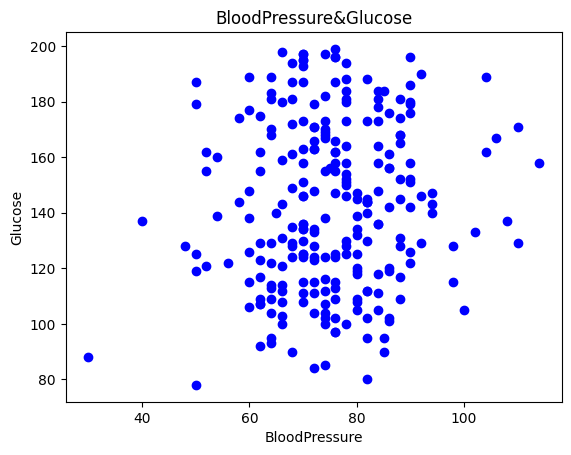

In [28]:
create_scatter_plot(Positive['BloodPressure'],Positive['Glucose'],'BloodPressure','Glucose','blue')

As I can compare postive & negative scatter plot with sns scatter plot all the value is matching, so now I
will create common scatter plot for both outcome.

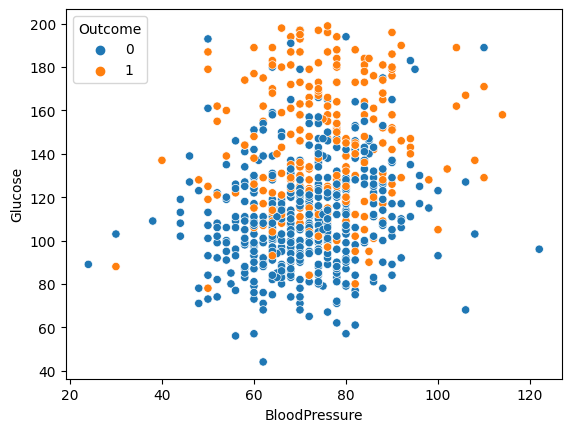

In [29]:
g =sns.scatterplot(x= "BloodPressure" ,y= "Glucose",
              hue="Outcome",
              data=diabetes_mod);


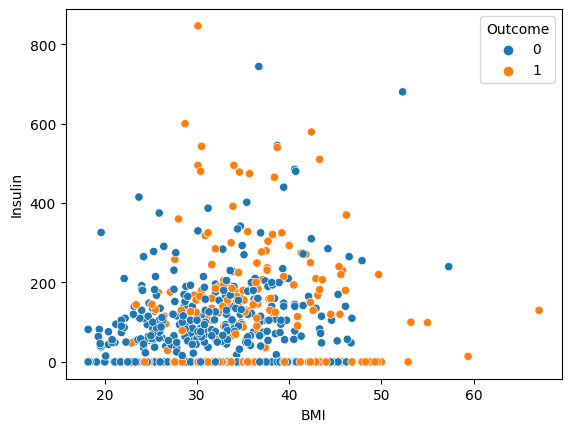

In [30]:
B=sns.scatterplot(x="BMI",y="Insulin",
                  hue="Outcome",data=diabetes_mod);

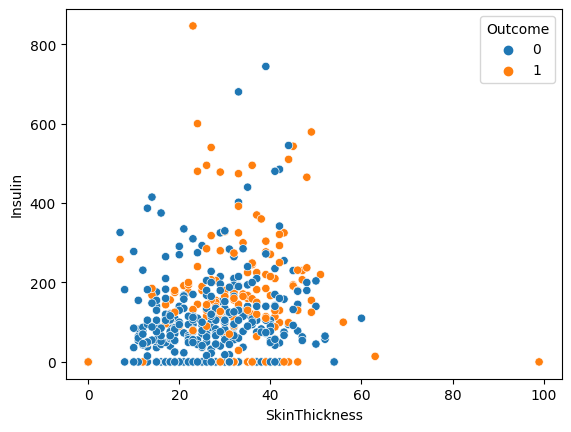

In [31]:
s=sns.scatterplot(x="SkinThickness",y="Insulin",hue="Outcome",data=diabetes_mod);

In [32]:
##correlation matrix
diabetes_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


## HEATMAP

<Axes: >

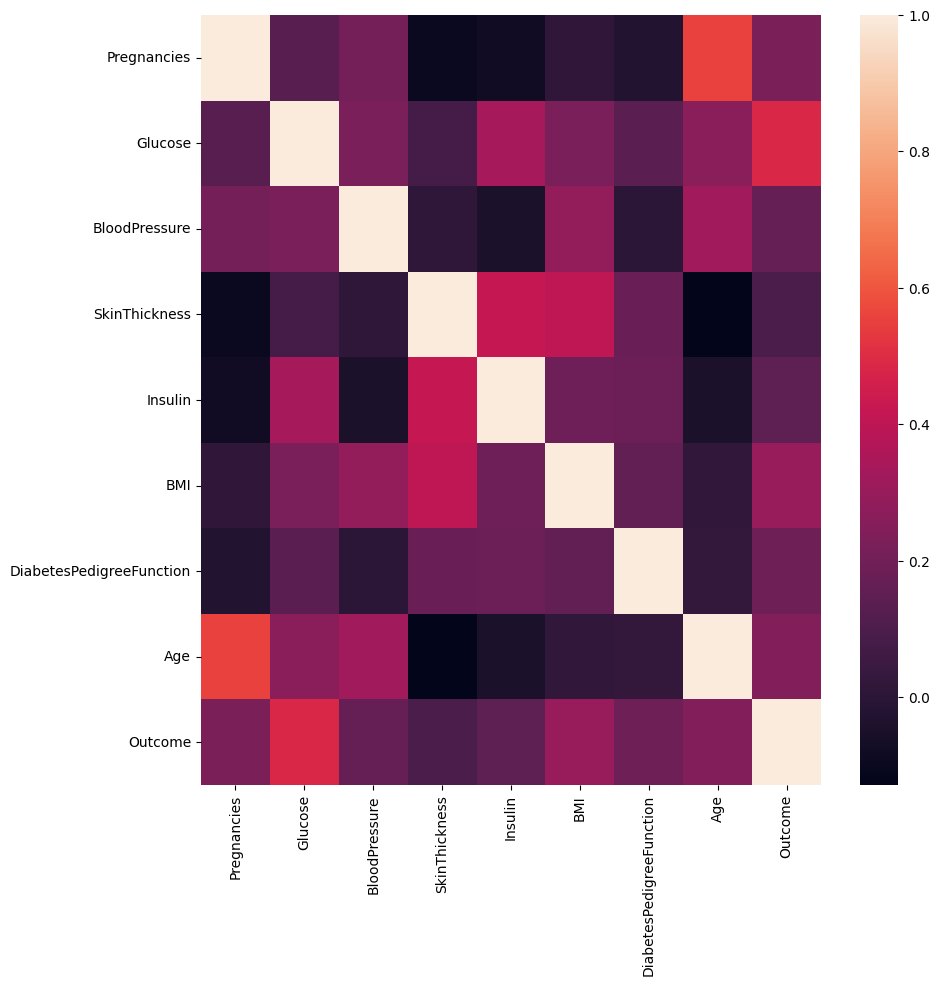

In [33]:
##correlation heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(diabetes_mod.corr())

<Axes: >

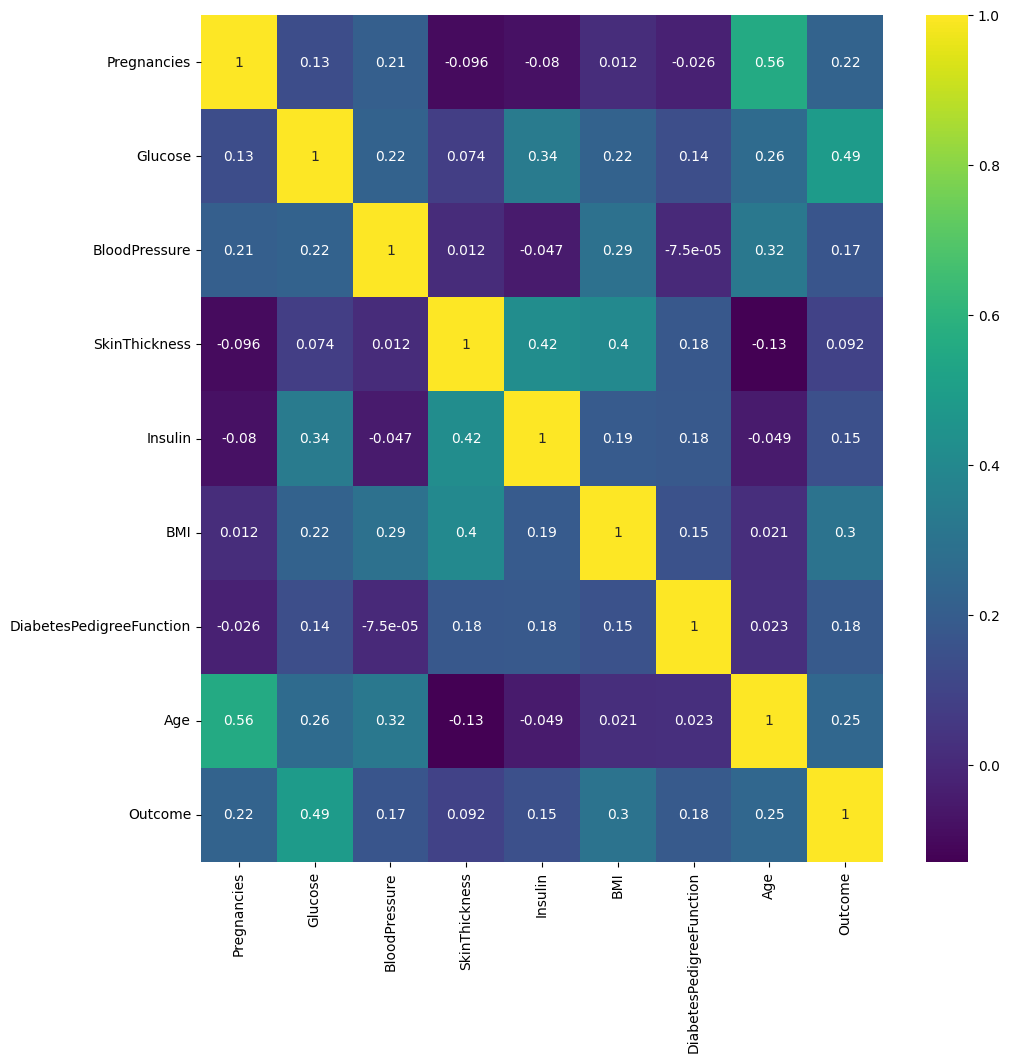

In [34]:
plt.subplots(figsize=(11,11))
sns.heatmap(diabetes_mod.corr(),annot=True,cmap='viridis')

## Logistic Regression and model building

In [35]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
## train test split model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=12)

## To Create Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## import warning filter
from warnings import simplefilter
## ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)




In [39]:
## logestic regression model
#LR Model
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [40]:
##LR model score and accuracy score

print("LogisticRegression Score :{}".format(model_LR.score(X_train,y_train)))
y_pred = model_LR.predict(X_test)
scores = (accuracy_score(y_test, y_pred))
print("LogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.7707509881422925
LogisticRegression Accuracy Score :0.7477064220183486


In [41]:
accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [42]:
##fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    accuracyScores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(tr_split_data)

  Name     Score  Accuracy Score
0   LR  0.770751        0.747706
1  SVC  0.772727        0.733945
2  KNN  0.804348        0.701835
3   DT  1.000000        0.711009
4  GNB  0.772727        0.706422
5   RF  1.000000        0.729358
6   GB  0.948617        0.692661


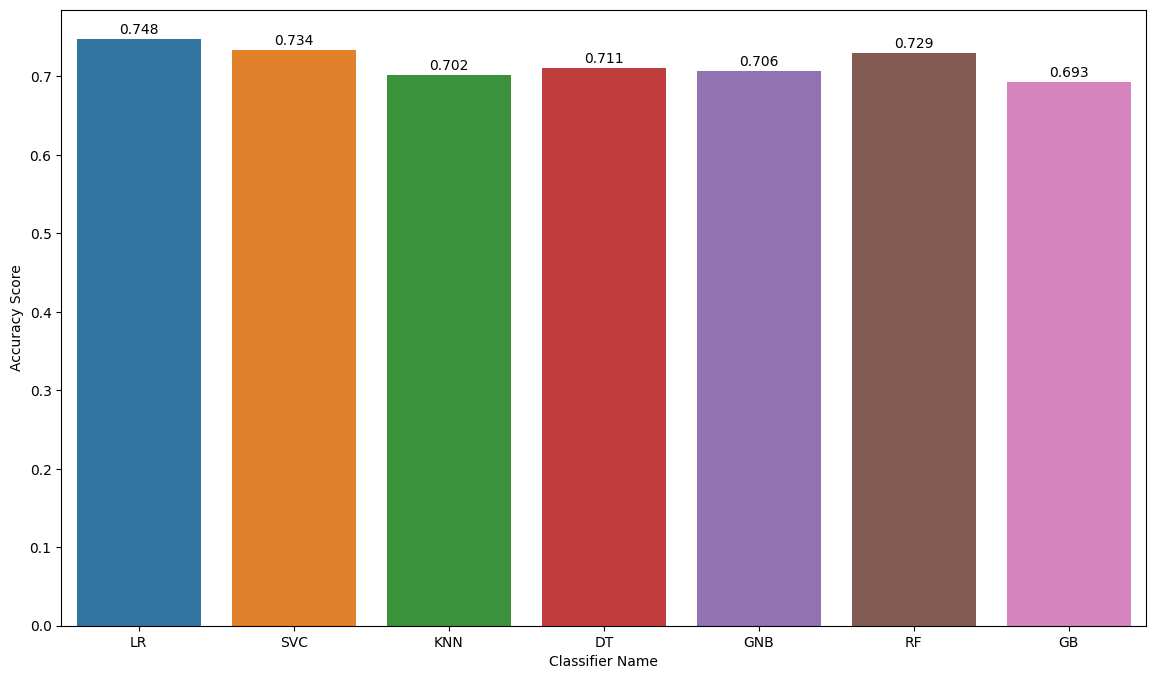

In [43]:
##graphs
plt.subplots(figsize=(14,8))
axis = sns.barplot(x = 'Name', y = 'Accuracy Score', data = tr_split_data)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.007, '{:1.3f}'.format(height), ha="center")

plt.show()

In [44]:
## check confusion matrix
#y is label value & X is feature value
cm = confusion_matrix(y,model_LR.predict(X))
cm

array([[425,  50],
       [121, 128]])

In [45]:
print(classification_report(y,model_LR.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       475
           1       0.72      0.51      0.60       249

    accuracy                           0.76       724
   macro avg       0.75      0.70      0.72       724
weighted avg       0.76      0.76      0.75       724



In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

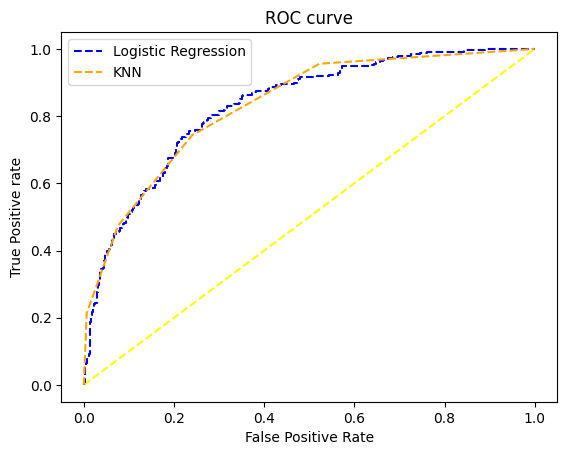

AUC LR: 0.83068 AUC KNN: 0.83140


In [47]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) - LR, KNN
# predict probabilities for LR
probs_LR = model_LR.predict_proba(X)
# predict probabilities for KNN - where models[2] is KNN
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
probs_KNN = model_KNN.predict_proba(X)

# Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values: calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs_LR[:, 1],pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y, probs_KNN[:, 1],pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

# plot no skill
plt.plot(p_fpr, p_tpr, linestyle='--',color='yellow')
plt.plot(fpr, tpr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')

# plot the roc curve for the model
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#plt.plot(fpr, tpr, marker='.')
plt.legend(loc='best')
plt.show();
# keep probabilities for the positive outcome only
#The AUC score can be computed using the roc_auc_score() method of sklearn: calculate AUC
auc_LR = roc_auc_score(y, probs_LR[:, 1])
auc_KNN = roc_auc_score(y, probs_KNN[:, 1])
print('AUC LR: %.5f' % auc_LR, 'AUC KNN: %.5f' % auc_KNN)


In [48]:
def generate_graph(recall, precision,name):
    # plot no skill
    # plot the precision-recall curve for the model
    plt.figure()
    plt.subplots(figsize=(10,4))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label='No Skill')
    plt.plot(recall, precision, marker='.',label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()


===================------------------- Precision Recall Curve for LR -------------------===================



<Figure size 640x480 with 0 Axes>

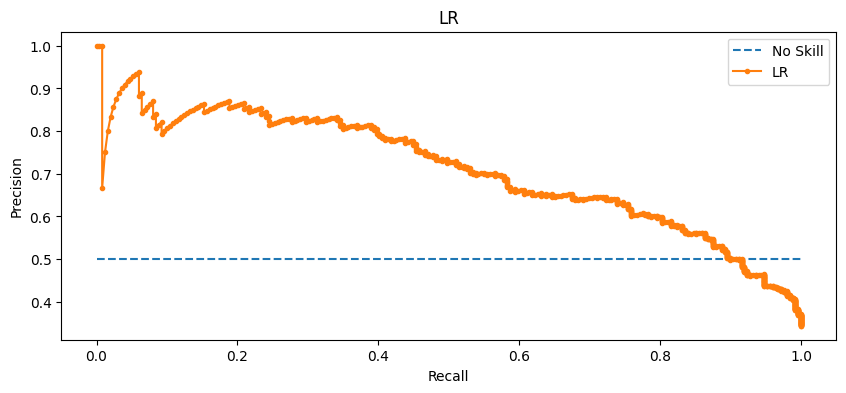

LR calculated value : F1 Score =0.600, Area Under the Curve=0.710, Average Precision=0.712

The above precision-recall curve plot is showing the precision/recall for each threshold for a LR model (yellow) compared to a no skill model (green).

===================------------------- Precision Recall Curve for KNN -------------------===================



<Figure size 640x480 with 0 Axes>

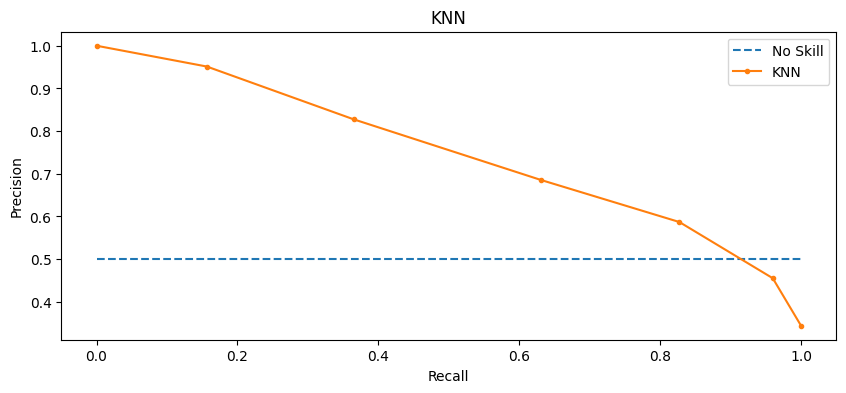

KNN calculated value : F1 Score =0.657, Area Under the Curve=0.749, Average Precision=0.693

The above precision-recall curve plot is showing the precision/recall for each threshold for a KNN model (yellow) compared to a no skill model (green).

===================------------------- Precision Recall Curve for DT -------------------===================



<Figure size 640x480 with 0 Axes>

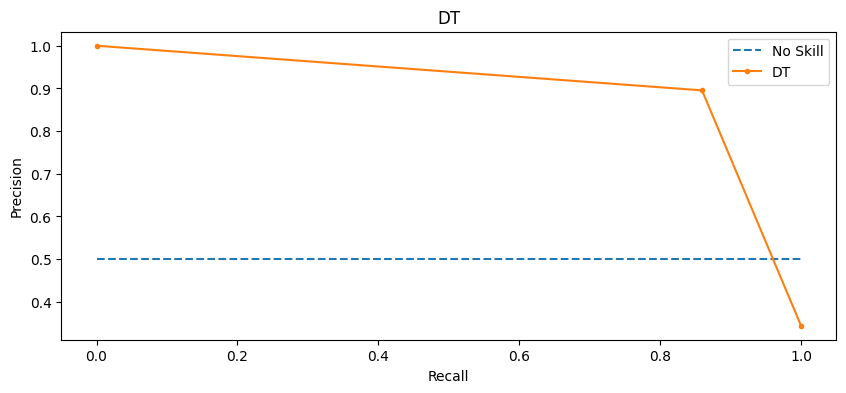

DT calculated value : F1 Score =0.877, Area Under the Curve=0.902, Average Precision=0.818

The above precision-recall curve plot is showing the precision/recall for each threshold for a DT model (yellow) compared to a no skill model (green).

===================------------------- Precision Recall Curve for GNB -------------------===================



<Figure size 640x480 with 0 Axes>

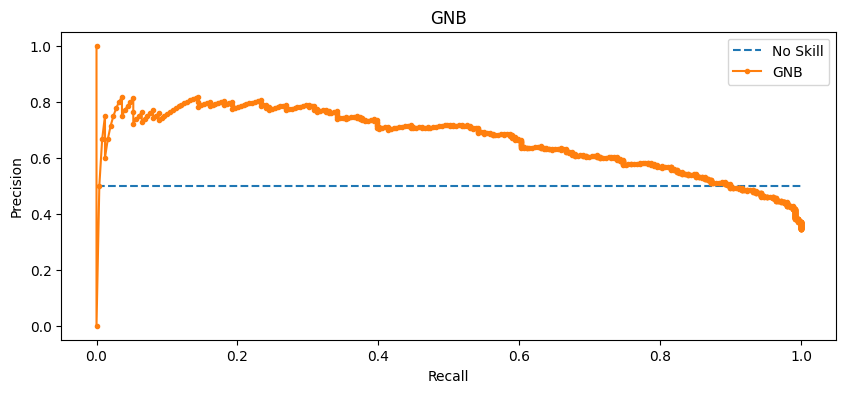

GNB calculated value : F1 Score =0.626, Area Under the Curve=0.666, Average Precision=0.669

The above precision-recall curve plot is showing the precision/recall for each threshold for a GNB model (yellow) compared to a no skill model (green).

===================------------------- Precision Recall Curve for RF -------------------===================



<Figure size 640x480 with 0 Axes>

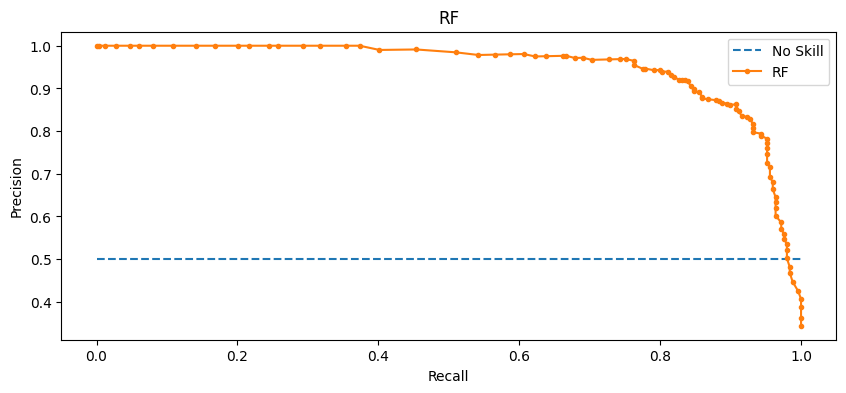

RF calculated value : F1 Score =0.873, Area Under the Curve=0.949, Average Precision=0.948

The above precision-recall curve plot is showing the precision/recall for each threshold for a RF model (yellow) compared to a no skill model (green).

===================------------------- Precision Recall Curve for GB -------------------===================



<Figure size 640x480 with 0 Axes>

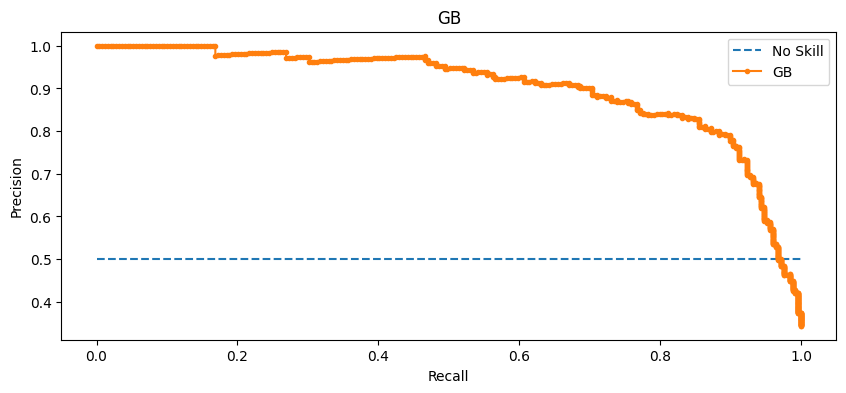

GB calculated value : F1 Score =0.806, Area Under the Curve=0.903, Average Precision=0.903

The above precision-recall curve plot is showing the precision/recall for each threshold for a GB model (yellow) compared to a no skill model (green).


In [49]:
#Store algorithm into array to get score and accuracy
p_r_Models = []
p_r_Models.append(('LR', LogisticRegression(solver='liblinear')))
p_r_Models.append(('KNN', KNeighborsClassifier()))
p_r_Models.append(('DT', DecisionTreeClassifier()))
p_r_Models.append(('GNB', GaussianNB()))
p_r_Models.append(('RF', RandomForestClassifier()))
p_r_Models.append(('GB', GradientBoostingClassifier()))
#Precision Recall Curve for All classifier
for name, model in p_r_Models:
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    print("\n===================------------------- Precision Recall Curve for {} -------------------===================\n".format(name))
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = model.predict(X)
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y, probs)
    # calculate F1 score, # calculate precision-recall AUC
    f1, auc = f1_score(y, yhat), auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y, probs)
    generate_graph(recall, precision,name)
    print(str(name) + " calculated value : " + 'F1 Score =%.3f, Area Under the Curve=%.3f, Average Precision=%.3f\n' % (f1, auc, ap))
    print("The above precision-recall curve plot is showing the precision/recall for each threshold for a {} model (yellow) compared to a no skill model (green).".format(name))

## Data Reporting:
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

<h3>URL to view created data reporting viz - <a href="https://public.tableau.com/views/healthcare_16774867341890/HEALTHCARE-DIABETESANDNON-DIABETES?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link"> LINK </a></h3>